#perspective transformation

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

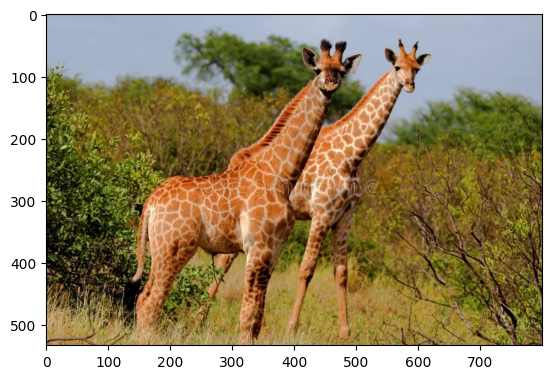

In [5]:
image=cv2.imread("giraffe.png")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [6]:
image_rgb.shape

(534, 800, 3)

In [12]:
rows,cols,_=image_rgb.shape  
input_points=np.float32([[50,50],[cols - 50,50],[50,rows-50],[cols-50,rows-50]])
output_points=np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])
# Define the transformation matrix
...
# transformation matrix for perspective transform
# 3*3
# c e f
# d e f
# g h i

# a,b,c is the responsible for horizontal scaling rotation ans tranlation
# d,e,f is the responsible for vertical scaling rotation and translation
# g,h,i is the responsible for  perspective components that account for depth ans skew
# ...
m=cv2.getPerspectiveTransform(input_points,output_points)
print(m)

[[ 1.11828255e+00  2.22689795e-01 -5.69027396e+01]
 [-6.40284910e-02  1.05561716e+00  5.18793436e+01]
 [ 1.68841277e-04  1.22914094e-04  1.00000000e+00]]


(-0.5, 799.5, 533.5, -0.5)

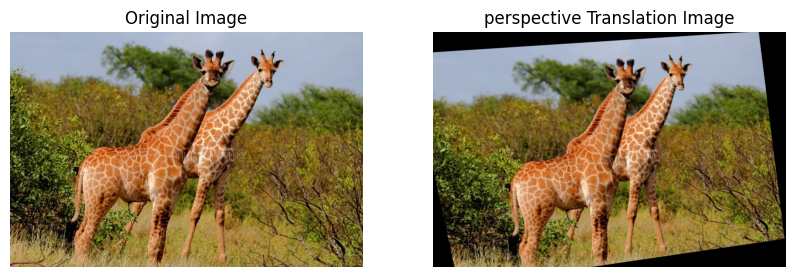

In [15]:
perspective_image=cv2.warpPerspective(image_rgb,m,(cols,rows))
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title('perspective Translation Image')
plt.axis('off')

affine transformation

(-0.5, 799.5, 533.5, -0.5)

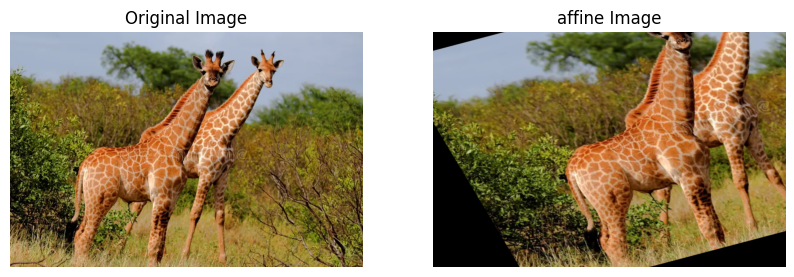

In [23]:
input_points=np.float32([[50,50],[200,50],[50,200]])
output_points=np.float32([[10,100],[200,50],[100,250]])

m=cv2.getAffineTransform(input_points,output_points)
affine_image=cv2.warpAffine(image_rgb,m,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title('affine Image')
plt.axis('off')


ROTATION


(-0.5, 799.5, 533.5, -0.5)

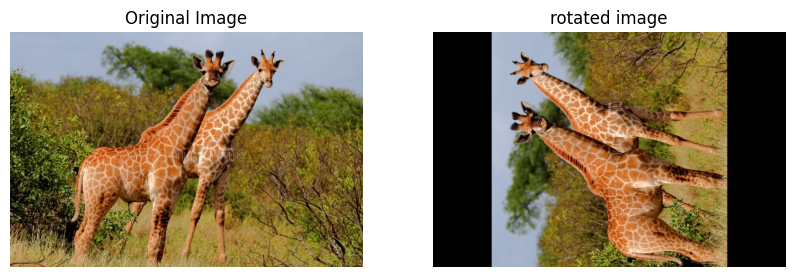

In [26]:
angle=90
center=(cols//2,rows//2)
scale=1.0

m=cv2.getRotationMatrix2D(center,angle,scale)
rotated_image=cv2.warpAffine(image_rgb,m,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title('rotated image')
plt.axis('off')


shearing 

(-0.5, 1599.5, 533.5, -0.5)

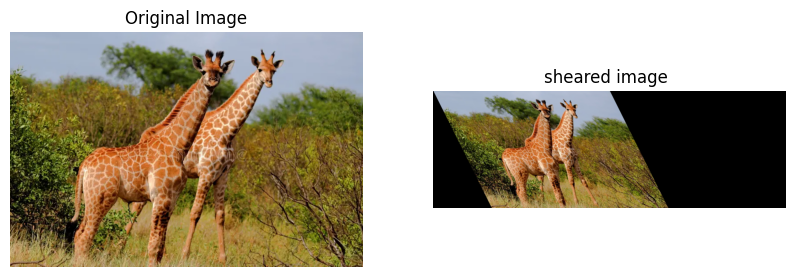

In [31]:
angle=90
center=(cols//2,rows//2)
scale=1.0
shear_x,shear_y=0.5,0

m=np.float32([[1,shear_x,0],
              [shear_y,1,0]])
sheared_image=cv2.warpAffine(image_rgb,m,(cols*2,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title('sheared image ')
plt.axis('off')


translation

(-0.5, 799.5, 533.5, -0.5)

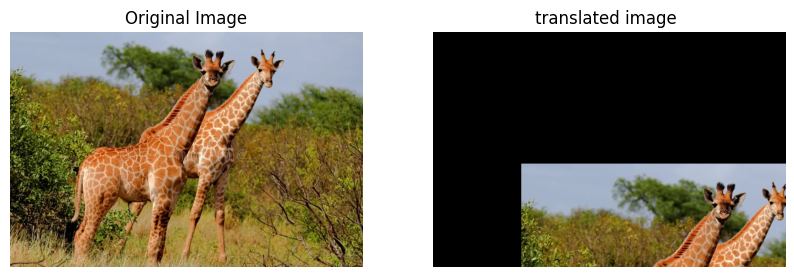

In [33]:
# angle=90
# center=(cols//2,rows//2)
# scale=1.0
tx,ty=200,300

m=np.float32([[1,0,tx],
              [0,1,ty]])
translated_image=cv2.warpAffine(image_rgb,m,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title('translated image ')
plt.axis('off')